# Прикладная статистика в машинном обучении

## Семинар 9. Теорема Гаусса-Маркова и гетероскедастичность.

### Теорема Гаусса-Маркова.
---

**Теорема.** Если
1. $y = X\beta + u$, $\beta$ -- константы.
2. Оценивается регрессия $\hat{y} = X\hat{\beta}$ при помощи МНК.
3. Матрица $X$ детерминирована и имеет полный ранг.
4. $\mathbb{E}(u) = 0, \mathrm{Var}(u) = \sigma^2 I$.
5. $n \ge k$,

то
1. $\hat{\beta}$ существуют и единственны.
2. $\hat{\beta}$ линейны по $y$.
3. $\mathbb{E}(\hat{\beta}) = \beta$.
4. $\hat{\beta}$ эффективны в классе линейных по $y$ несмещённых оценок.

### Гетероскедастичность.
---

#### Определение.

Нарушение предпосылки ТГМ: $\mathrm{Var}(u_i) = \sigma_i^2 \ne \sigma$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Статистика
import statsmodels.formula.api as smf # Модели и гипотезы
import statsmodels.stats.api as sms # Тесты

Text(0.5, 1.0, 'Гетероскедастичность')

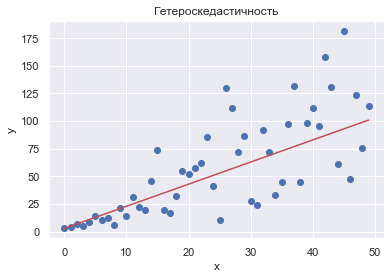

In [2]:
x = np.arange(50)
u = [np.random.normal(0, i) for i in range(50)]
y = 3 + 2 * x + u

plt.scatter(x, y)
plt.plot(x, y - u, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Гетероскедастичность')

Проблема: $\hat{\sigma}^2 = \dfrac{RSS}{n-k}$ неверна, а значит неверны $\mathrm{se}(\hat{\beta})$, а значит неверно строятся доверительные интервалы и нельзя доверять результатам проверки гипотез.

#### Идентификация.

Существует большое количество различных статистических тестов. Например:

1. **Goldfeld-Quandt test.**

Тестируется гипотеза $H_0$ против $H_1$:
$$
\begin{cases}
H_0: \sigma_i^2 = \sigma^2, \\
H_1: \sigma_i \sim X_j.
\end{cases}
$$

Схема:
1. Отсортировать регрессор $X_j$ по возрастанию.
2. Разбить отсортированный ряд на три одинаковые части. Предполагается, что первая часть имеет случайную ошибку $\sigma^2_1$, а третья часть $\sigma^2_2$. Вторая часть выбрасывается.
3. Проверить гипотезу
$$
\begin{cases}
H_0: \sigma_1^2 = \sigma_2^2, \\
H_1: \sigma_1^2 \ne \sigma_2^2.
\end{cases}
$$

Для этого оцениваем модель по первой части наблюдений и получаем $RSS_1$, оцениваем по второй части наблюдений и получаем $RSS_2$, а затем используем $F$-статистику:

$$
F = \dfrac{RSS_2 / (n_2 - k)}{RSS_1 / (n_1 - k)}.
$$

Если $H_0$ отвергается, то в данных наблюдается гетероскедастичность из-за $X_j$.

In [8]:
data.shape[0] / 3 - 6 # F_{17974, 17974}

17974.0

In [3]:
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
model = smf.ols('np.log(price) ~ depth + table + x + y + z', data = data).fit()

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.226e+05
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:07:49   Log-Likelihood:                -9493.6
No. Observations:               53940   AIC:                         1.900e+04
Df Residuals:                   53934   BIC:                         1.905e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8430      0.079     35.811      0.000       2.687       2.999
depth          0.0093      0.001      8.986      0.000       0.007       0.011
table         -0.0109      0.001    -18.413      0.000      -0.012      -0.010
x              0.7973      0.007    118.034      0.000       0.784       0.811
y              0.0365      0.005      7.425      0.000       0.027       0.046
z              0.0615      0.009      7.204      0.000       0.045       0.078
==============================================================================
Omnibus:                    24199.104   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2130668.668
Skew:                           1.252   Prob(JB):                         0.00
Kurtosis:                      33.688   Cond. No.                     5.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
?sms.het_goldfeldquandt

In [7]:
# GQ-test: the first value is F-stat
sms.het_goldfeldquandt(model.model.endog, model.model.exog)
# H0 не отвергается, гетероскедастичность не выявлена

(0.5571425675792742, 0.9999999999999999, 'increasing')

2. **Breush-Pagan test.**

Тестируется гипотеза $H_0$ против $H_1$:

$$
\begin{cases}
H_0: \sigma_i^2 = \sigma^2, \\
H_1: \sigma_i^2 \sim f(Z\alpha),
\end{cases}
$$

где $f$ -- некоторая гладкая функция, $Z$ -- некоторые регрессоры, которые могут быть и не включены в нашу модель.

Схема:
1. Оценить регрессию $\hat{y} = X\hat{\beta}$.
2. Получить оценку $\hat{\sigma}^2 = \dfrac{RSS}{n}$ (смещённая).
3. Создать новую переменную $q := \dfrac{y-\hat{y}}{\hat{\sigma}^2}$ (поэлементно).
4. Оценить регрессию $\hat{q} = Z\hat{\alpha}$.
5. Протестировать $H_0$ при помощи статистики
$$
\chi^2 = \dfrac{ESS}{2} \sim \chi^2_{\text{число регрессоров в $Z$, не считая константный}}.
$$

In [11]:
?sms.het_breuschpagan

In [10]:
# Первое значение -- значение статистики
sms.het_breuschpagan(model.resid, model.model.exog)
# H0 отвергается, гетероскедастичность выявлена

(318.88832638372446,
 8.68231926481354e-67,
 64.14981882459652,
 5.505510514064581e-67)

3. **White test.**

Тестируется гипотеза $H_0$ против $H_1$:

$$
\begin{cases}
H_0: \sigma_i^2 = \sigma^2, \\
H_1: \exists i: \sigma_i^2 \ne \sigma^2,
\end{cases}
$$

Схема:
1. Оценить регрессию $\hat{y} = X\hat{\beta}$.
2. Оценить регрессию $(y_i - \hat{y}_i)^2 = a_0 + \sum_jb_jX_j + \sum_jc_jX_j^2 + \sum_{i<j}d_jX_iX_j$. Найти $R^2$ в этой регрессии.
3. Проверить $H_0$ при помощи статистики $\chi^2 = n \times R^2 \sim \chi^2_{1 + j + j + (j^2 - j)/2}$.

In [12]:
?sms.het_white

In [13]:
# Первое значение -- значение статистики
sms.het_white(model.resid, model.model.exog)
# H0 отвергается, гетероскедастичность выявлена

(8939.302502210943, 0.0, 535.5453119814345, 0.0)

#### Корректировка гетероскедастичности.

**I.** В теории: пусть знаем $\sigma_i^2$ для всех $i$. В этом случае мы можем "исправить" модель так, чтобы гетероскедастичности не было.

**Задание 1.** Рассмотрим модель $y_i = \beta_0 + \beta_1x_i + u_i$, $\mathrm{Var}(u_i) = \dfrac{\sigma^2}{(3 + x_i)^2}$. Скорректируйте гетероскедастичность в модели и выпишите выражение для оценок скорректированной модели.

**Решение.**
Заметим, что дисперсия случайной ошибки представляется в виде $\mathrm{Var}(u_i) = \sigma^2 \times f(x_i).$ Поделим каждый компонент регрессии на $\sqrt{f(x_i)}$:

$$
(3 + x_i)y_i = \beta_0(3+x_i) + \beta_1x_i(3+x_i) + (3+x_i)u_i.
$$

Переобозначим: $(3 + x_i)y_i =: \tilde{y}_i$, $\beta_0(3+x_i) =: \beta_0\tilde{X}_{1i}$, $\beta_1x_i(3+x_i) =: \beta_1\tilde{X}_{2i}$, $(3+x_i)u_i =: \tilde{u}_i$. Заметим, что в модели

$$
\tilde{y}_i = \beta_0\tilde{X}_{1i} + \beta_1\tilde{X}_{2i} + \tilde{u}_i
$$

гетероскедастичности нет, потому что

$$
\mathrm{Var}(\tilde{u}_i) = \dfrac{(3 + x_i)^2\sigma^2}{(3 + x_i)^2} = \sigma^2,
$$

а значит, к ней применима ТГМ. Оценки в этой модели можно рассчитать по стандартной формуле:

$$
\hat{\beta} = (\tilde{X}'\tilde{X})^{-1}\tilde{X}'\tilde{y}.
$$

**Задание 2.** Рассмотрим модель $y = X\beta + u$, $\mathrm{Var}(u) = \sigma^2A$, $A$ известна. 
1. Скорректируйте гетероскедастичность в модели и выпишите выражение для оценок этой модели.
2. Выведите дисперсию оценок скорректированной модели.
3. Выведите дисперсию оценок МНК.

**Решение.**

1. Как и в предыдущей задаче, корректировка производится делением компонентов модели на корень из функции, стоящей при $\sigma$. В матричном случае эта операция превращается в домножение на $A^{-1/2}$, где

$$
A^{-1/2} = P
\begin{pmatrix} 
1/\sqrt{\lambda_1} & 0 & \ldots & 0 \\
0 & 1/\sqrt{\lambda_1} & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 1/\sqrt{\lambda_n}
\end{pmatrix}P^{-1},
$$
где $P$ -- матрица собственных векторов.

Скорректированная модель: 

$$
A^{-1/2}y = A^{-1/2}X\beta + A^{-1/2}u
$$

$$
\hat{\beta}^{\mathrm{corr}} = (\tilde{X}'\tilde{X})^{-1}\tilde{X}'\tilde{y} = (X'A^{-1/2}A^{-1/2}X)^{-1}X'A^{-1/2}A^{-1/2}y = (X'A^{-1}X)^{-1}X'A^{-1}y.
$$

2.

$$
\mathrm{Var}(\hat{\beta}^{\mathrm{corr}}) = (X'A^{-1}X)^{-1}X'A^{-1}\sigma^2A A^{-1}X(X'A^{-1}X)^{-1} = (X'A^{-1}X)^{-1}\sigma^2.
$$

Заметим, что

$$
\mathrm{Var}(\hat{\beta}^{\mathrm{corr}}) = (X'A^{-1}X)^{-1}\sigma^2 = (\tilde{X}'\tilde{X})^{-1}\sigma^2.
$$

3.

$$
\mathrm{Var}(\hat{\beta}^{\mathrm{OLS}}) = \mathrm{Var}((X'X)^{-1}X'y) = (X'X)^{-1}X'AX(X'X)^{-1}\sigma^2.
$$

**II.** На практике: $\sigma_i^2$ не знаем. Тогда есть три варианта.

**Вариант 1:** исправить только доверительные инетрвалы для параметров модели, оцениваемой при помощи МНК,так, чтобы они были устойчивы к гетероскедастичности. Тогда

$$
\hat{\mathrm{Var}}(\hat{\beta}_{OLS})_{HC} = (X'X)^{-1}X'\hat{\mathrm{Var}}(u)_{HC}X(X'X)^{-1}.
$$

$\hat{\mathrm{Var}}(u)_{HC}$ можно взять разными способами:
1. $HC_0$: $\hat{\mathrm{Var}}(u)_{HC_0} = \mathrm{diag}(\hat{u}^2_1, \ldots, \hat{u}^2_n)$.
2. $HC_3$: $\hat{\mathrm{Var}}(u)_{HC_3} = \mathrm{diag}(\hat{u}^2_{1, CV}, \ldots, \hat{u}^2_{n, CV})$.

**Задание 3.** Рассмотрим модель $y_i = \beta x_i + u_i$. Известно, что $y_1 = y_2 = y_3 = 2$, $x_1 = x_2 = 1$, $x_3 = 4$.
1. Найдите $\hat{\beta}_{OLS}$.
2. Найдите $\hat{\mathrm{Var}}(\hat{\beta_{OLS}})_{HC_0}$.
3. Найдите $\hat{\mathrm{Var}}(\hat{\beta_{OLS}})_{HC_3}$.

**Решение.**

1. Вспомним, что в модели парной регрессии без константы МНК-оценка коэффициента строится следующим образом:

$$
\hat{\beta}_{OLS} = \dfrac{\sum_i x_iy_i}{\sum x_i^2} = \dfrac{12}{18} = \dfrac{2}{3}.
$$

2. Найдём остатки:

$$
\hat{y} = x\hat{\beta} = \begin{pmatrix} 2/3 & 2/3 & 8/3 \end{pmatrix}'.
$$

$$
\hat{u} = y - \hat{y} = \begin{pmatrix} 4/3 & 4/3 & -2/3 \end{pmatrix}'
$$

Тогда

$$
\hat{\mathrm{Var}}(\hat{\beta_{OLS}})_{HC_0} = \dfrac{1}{18} \begin{pmatrix} 1 & 1 & 4 \end{pmatrix}
\begin{pmatrix}
(4/3)^2 & 0 & 0 \\
0 & (4/3)^2 & 0 \\
0 & 0 & (-2/3)^2
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
4
\end{pmatrix}\dfrac{1}{18}.
$$

3. Чтобы получить остатки на кросс-валидации, нужно для $i$-го наблюдения оценить модель на прочих $n-1$ наблюдениях и рассчитать остатки по полученным оценкам. Для нашего примера:

| $y_i$      | $x_i$ | $\hat{\beta}_{CV}$ | $\hat{y}_{CV}$ | $\hat{u}_{CV}$ |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| 2 | 1 | $\frac{10}{17}$ | $\frac{10}{17}$ | $\frac{24}{17}$|
| 2 | 1 | $\frac{10}{17}$ | $\frac{10}{17}$ | $\frac{24}{17}$|
| 2 | 4 | 2 | 8 | -6 |

Тогда

$$
\hat{\mathrm{Var}}(\hat{\beta_{OLS}})_{HC_3} = \dfrac{1}{18} \begin{pmatrix} 1 & 1 & 4 \end{pmatrix}
\begin{pmatrix}
(24/17)^2 & 0 & 0 \\
0 & (24/17)^2 & 0 \\
0 & 0 & (-6)^2
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
4
\end{pmatrix}\dfrac{1}{18}.
$$

In [14]:
model.cov_params()

,Intercept,depth,table,x,y,z
Intercept,0.006303,-7.520541e-05,-2.917492e-05,-1.201055e-04,-3.607090e-05,2.583795e-04
depth,-0.000075,1.077368e-06,1.561260e-07,2.118084e-06,4.742715e-07,-4.281410e-06
table,-0.000029,1.561260e-07,3.530415e-07,-2.831128e-07,1.047273e-07,7.671272e-08
x,-0.000120,2.118084e-06,-2.831128e-07,4.562656e-05,-2.053421e-05,-3.904137e-05
y,-0.000036,4.742715e-07,1.047273e-07,-2.053421e-05,2.417944e-05,-5.709749e-06
z,0.000258,-4.281410e-06,7.671272e-08,-3.904137e-05,-5.709749e-06,7.293067e-05


In [15]:
model.cov_HC0

array([[ 2.53646463e-02, -3.79811138e-04, -3.70015534e-05,
        -1.64932777e-03, -1.37831330e-03,  4.96374117e-03],
       [-3.79811138e-04,  6.02318499e-06,  1.90578318e-07,
         3.32326293e-05,  1.65964402e-05, -8.15647500e-05],
       [-3.70015534e-05,  1.90578318e-07,  4.89255718e-07,
        -6.41399781e-06,  5.51885356e-06,  6.46117971e-07],
       [-1.64932777e-03,  3.32326293e-05, -6.41399781e-06,
         1.70474508e-03, -1.30321102e-03, -6.59553761e-04],
       [-1.37831330e-03,  1.65964402e-05,  5.51885356e-06,
        -1.30321102e-03,  1.42545309e-03, -1.88329799e-04],
       [ 4.96374117e-03, -8.15647500e-05,  6.46117971e-07,
        -6.59553761e-04, -1.88329799e-04,  1.38362462e-03]])

In [16]:
model.HC0_se

Intercept    0.159263
depth        0.002454
table        0.000699
x            0.041289
y            0.037755
z            0.037197
dtype: float64

In [17]:
# Модель можно переоценить с учётом робастных стандартных ошибок
model_hc = smf.ols('np.log(price) ~ depth + table + x + y + z', data = data).fit(cov_type = 'HC0')
model_hc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 4.141e+04
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:37:09   Log-Likelihood:                -9493.6
No. Observations:               53940   AIC:                         1.900e+04
Df Residuals:                   53934   BIC:                         1.905e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8430      0.159     17.851      0.000       2.531       3.155
depth          0.0093      0.002      3.800      0.000       0.005       0.014
table         -0.0109      0.001    -15.642      0.000      -0.012      -0.010
x              0.7973      0.041     19.310      0.000       0.716       0.878
y              0.0365      0.038      0.967      0.334      -0.037       0.111
z              0.0615      0.037      1.654      0.098      -0.011       0.134
==============================================================================
Omnibus:                    24199.104   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2130668.668
Skew:                           1.252   Prob(JB):                         0.00
Kurtosis:                      33.688   Cond. No.                     5.43e+03
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 5.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Вариант 2.** Использовать FGLS.

$$
\hat{\beta}_{FGLS} = (X'\hat{\Omega}^{-1}X)^{-1}X'\hat{\Omega}^{-1}y
$$

$\hat{\Omega}$ можно оценивать по-разному: [Пример 1](https://www.statlect.com/fundamentals-of-statistics/generalized-least-squares), [Пример 2](https://uh.edu/~bsorense/GLS_May_2017.pdf), [Пример 3](http://www3.grips.ac.jp/~yamanota/Lecture_Note_10_GLS_WLS_FGLS.pdf), [Пример 4](https://www.mathworks.com/help/econ/fgls.html#buicqm4-12). Можно использовать итерационный алгоритм, описанный, например, в [Википедии](https://en.wikipedia.org/wiki/Generalized_least_squares).

Метод полезен, когда у нас есть некоторое представление о том, как устроена ковариационная матрица случайных ошибок.

In [18]:
from statsmodels.regression.linear_model import OLS, GLS

In [19]:
# Например, как описано в примере 3
log_resid = np.log(model.resid ** 2)
hat_omega_model = OLS(log_resid, model.model.exog).fit()
weights = 1 / np.exp(model.model.exog @ hat_omega_model.params)

In [20]:
weights

array([71.38203285, 90.7696654 , 99.93012519, ..., 59.07510695,
       49.6225778 , 47.19220893])

In [21]:
model_gls = GLS(model.model.endog, model.model.exog, sigma = weights).fit()
model_gls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            GLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.212e+05
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:43:41   Log-Likelihood:                -11563.
No. Observations:               53940   AIC:                         2.314e+04
Df Residuals:                   53934   BIC:                         2.319e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9610      0.075     39.314      0.000       2.813       3.109
x1             0.0104      0.001     11.192      0.000       0.009       0.012
x2            -0.0118      0.001    -18.941      0.000      -0.013      -0.011
x3             0.8470      0.002    475.091      0.000       0.844       0.851
x4            -0.0076      0.000    -25.813      0.000      -0.008      -0.007
x5             0.0142      0.002      5.840      0.000       0.009       0.019
==============================================================================
Omnibus:                     7143.461   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93702.657
Skew:                          -0.047   Prob(JB):                         0.00
Kurtosis:                       9.456   Cond. No.                     5.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**III.** Использовать бутстрэп.

**Pairs Bootstrap.**

Разные реализации, например, [так](https://www.researchgate.net/publication/254447243_Thirty_Years_of_Heteroskedasticity-Robust_Inference).

$$
\hat{\mathrm{Var}}(\hat{\beta})^* = \dfrac{1}{B-1}\sum_{j = 1}^B(\hat{\beta}_j^* - \bar{\beta}_j^*)(\hat{\beta}_j^* - \bar{\beta}_j^*)^T.
$$

In [22]:
n_reps = 100

cov_matr = np.zeros((6, 6))

for i in range(n_reps):
    # 1. Строим бутстрэп-выборку
    random_inds = np.random.randint(0, len(model.model.endog), size = len(model.model.endog))
    y_b = model.model.endog[random_inds]
    X_b = model.model.exog[random_inds, :]
    
    # 2. Оцениваем модель и обновляем ковариационную матрицу
    model_b = OLS(y_b, X_b).fit()
    coefs = np.array(model_b.params).reshape(-1, 1)
    cov_matr = cov_matr + (coefs - np.mean(coefs)) @ (coefs - np.mean(coefs)).T

In [23]:
pd.DataFrame(cov_matr / (n_reps - 1), columns = model.model.exog_names, index = model.model.exog_names)

,Intercept,depth,table,x,y,z
Intercept,5.263149,-1.452573,-1.493832,0.100355,-1.184546,-1.232553
depth,-1.452573,0.401024,0.412468,-0.026682,0.324929,0.340834
table,-1.493832,0.412468,0.424272,-0.027530,0.333671,0.350950
x,0.100355,-0.026682,-0.027530,0.042063,-0.063097,-0.025110
y,-1.184546,0.324929,0.333671,-0.063097,0.317653,0.271390
z,-1.232553,0.340834,0.350950,-0.025110,0.271390,0.294489


In [24]:
model.cov_params()

,Intercept,depth,table,x,y,z
Intercept,0.006303,-7.520541e-05,-2.917492e-05,-1.201055e-04,-3.607090e-05,2.583795e-04
depth,-0.000075,1.077368e-06,1.561260e-07,2.118084e-06,4.742715e-07,-4.281410e-06
table,-0.000029,1.561260e-07,3.530415e-07,-2.831128e-07,1.047273e-07,7.671272e-08
x,-0.000120,2.118084e-06,-2.831128e-07,4.562656e-05,-2.053421e-05,-3.904137e-05
y,-0.000036,4.742715e-07,1.047273e-07,-2.053421e-05,2.417944e-05,-5.709749e-06
z,0.000258,-4.281410e-06,7.671272e-08,-3.904137e-05,-5.709749e-06,7.293067e-05


**Wild Bootstrap.**

(Этот метод нужно будет реализовать в домашнем задании самостоятельно).